In [1]:
import pandas as pd

# 尝试多种编码方式读取CSV文件
encodings = ['utf-8', 'latin-1', 'gbk', 'iso-8859-1', 'cp1252']

df = None
for encoding in encodings:
    try:
        df = pd.read_csv('vgsales.csv', encoding=encoding)
        print(f"✅ 成功使用 {encoding} 编码读取文件")
        break
    except UnicodeDecodeError:
        continue
    except Exception as e:
        print(f"⚠️ 使用 {encoding} 编码时出错: {e}")
        continue

if df is None:
    print("❌ 无法读取文件，请检查文件编码")
else:
    print(f"📊 数据加载成功！共 {len(df)} 条记录")

✅ 成功使用 latin-1 编码读取文件
📊 数据加载成功！共 16598 条记录


In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,0.264667,0.146659,0.077774,0.048070,0.537498
std,4791.853933,0.816683,0.505350,0.309292,0.188588,1.555113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# 📈 销售趋势分析

我们将从以下几个角度分析游戏销售趋势：
1. 历年游戏发行数量趋势
2. 历年全球销售额趋势
3. 各地区销售额的时间趋势
4. 平均游戏销售额的变化


In [3]:
# 导入可视化库
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
import warnings

# 强制重新构建字体缓存（不删除旧缓存，避免编码错误）
import matplotlib
print("🔄 正在配置中文字体...\n")

# 抑制字体相关的警告
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 重新加载字体管理器，强制不使用缓存
try:
    fm._load_fontmanager(try_read_cache=False)
    print("✅ 字体管理器已重新加载\n")
except Exception as e:
    print(f"⚠️ 字体管理器加载警告: {e}\n")

# 查找系统中可用的中文字体
print("🔍 正在查找系统中的中文字体...\n")
chinese_fonts = []
for font in fm.fontManager.ttflist:
    font_name = font.name
    # 查找常见的中文字体
    if any(cn in font_name for cn in ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong', 'STSong', 'STKaiti', 'STHeiti']):
        if font_name not in chinese_fonts:  # 去重
            chinese_fonts.append(font_name)
            print(f"✓ 找到字体: {font_name}")

if chinese_fonts:
    # 优先使用Microsoft YaHei，因为它显示效果最好
    if 'Microsoft YaHei' in chinese_fonts:
        selected_font = 'Microsoft YaHei'
    else:
        selected_font = chinese_fonts[0]
    
    # 设置字体（移除Arial，只使用中文字体和DejaVu Sans）
    plt.rcParams.update({
        'font.sans-serif': [selected_font, 'DejaVu Sans'],  # 移除Arial
        'axes.unicode_minus': False,
        'font.size': 10,
        'font.family': 'sans-serif',
        # 为所有文本元素指定中文字体
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'axes.labelsize': 11,
        'axes.titlesize': 13,
        'legend.fontsize': 10,
        'figure.titlesize': 14
    })
    
    print(f"\n✅ 已设置字体为: {selected_font}")
else:
    # 如果没找到，尝试通用设置
    plt.rcParams.update({
        'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'sans-serif'],
        'axes.unicode_minus': False,
        'font.family': 'sans-serif'
    })
    print("\n⚠️ 未找到常见中文字体，使用默认设置")

# 设置样式
sns.set_style("whitegrid")
sns.set_palette("husl")

# ⚠️ 关键：强制设置所有可能的字体参数
if chinese_fonts:
    font_list = [selected_font, 'SimHei', 'Microsoft YaHei', 'KaiTi', 'SimSun']
else:
    selected_font = 'Microsoft YaHei'
    font_list = ['Microsoft YaHei', 'SimHei', 'KaiTi', 'SimSun']

# 多次设置，确保生效
for _ in range(3):  # 重复设置3次
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = font_list
    matplotlib.rcParams['axes.unicode_minus'] = False
    matplotlib.rcParams['font.family'] = 'sans-serif'

# 创建辅助函数，在每个图表前强制调用
def ensure_chinese():
    """在绘图前强制设置中文字体"""
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'sans-serif'
    # 返回当前字体以便验证
    return plt.rcParams['font.sans-serif'][0]

# 立即执行一次
current_font = ensure_chinese()

# 测试中文显示
print("\n✅ 可视化库已导入，样式已设置")
print(f"📊 matplotlib后端: {matplotlib.get_backend()}")
print(f"🔤 设置的字体: {selected_font}")
print(f"🔤 字体列表: {font_list}")
print(f"🔤 当前生效字体: {current_font}")
print(f"\n💡 重要：已在所有图表单元格添加 ensure_chinese()")
print(f"   重新运行所有图表单元格应该就能看到中文了！")


🔄 正在配置中文字体...

✅ 字体管理器已重新加载

🔍 正在查找系统中的中文字体...

✓ 找到字体: STKaiti
✓ 找到字体: KaiTi
✓ 找到字体: SimSun-ExtB
✓ 找到字体: FangSong
✓ 找到字体: SimSun
✓ 找到字体: Microsoft YaHei
✓ 找到字体: STSong
✓ 找到字体: SimHei

✅ 已设置字体为: Microsoft YaHei

✅ 可视化库已导入，样式已设置
📊 matplotlib后端: module://matplotlib_inline.backend_inline
🔤 设置的字体: Microsoft YaHei
🔤 字体列表: ['Microsoft YaHei', 'SimHei', 'Microsoft YaHei', 'KaiTi', 'SimSun']
🔤 当前生效字体: Microsoft YaHei

💡 重要：已在所有图表单元格添加 ensure_chinese()
   重新运行所有图表单元格应该就能看到中文了！


In [4]:
## 1️⃣ 数据清洗 - 处理缺失的年份数据

# 查看Year列的缺失情况
print(f"Year列缺失值数量: {df['Year'].isna().sum()}")
print(f"Year列当前数据类型: {df['Year'].dtype}")

# 处理Year列：转换为数字类型
# 先去除空值，然后转换为数字（使用pd.to_numeric处理可能的异常值）
df_with_year = df.dropna(subset=['Year']).copy()

# 尝试将Year转换为数字类型
df_with_year['Year'] = pd.to_numeric(df_with_year['Year'], errors='coerce')

# 再次去除转换失败的行（如果有的话）
df_with_year = df_with_year.dropna(subset=['Year']).copy()

# 转换为整数
df_with_year['Year'] = df_with_year['Year'].astype(int)

print(f"\n✅ 数据清洗完成！")
print(f"处理后的数据量: {len(df_with_year)} 条记录")
print(f"年份范围: {df_with_year['Year'].min()} - {df_with_year['Year'].max()}")


Year列缺失值数量: 271
Year列当前数据类型: object

✅ 数据清洗完成！
处理后的数据量: 16325 条记录
年份范围: 1980 - 2020


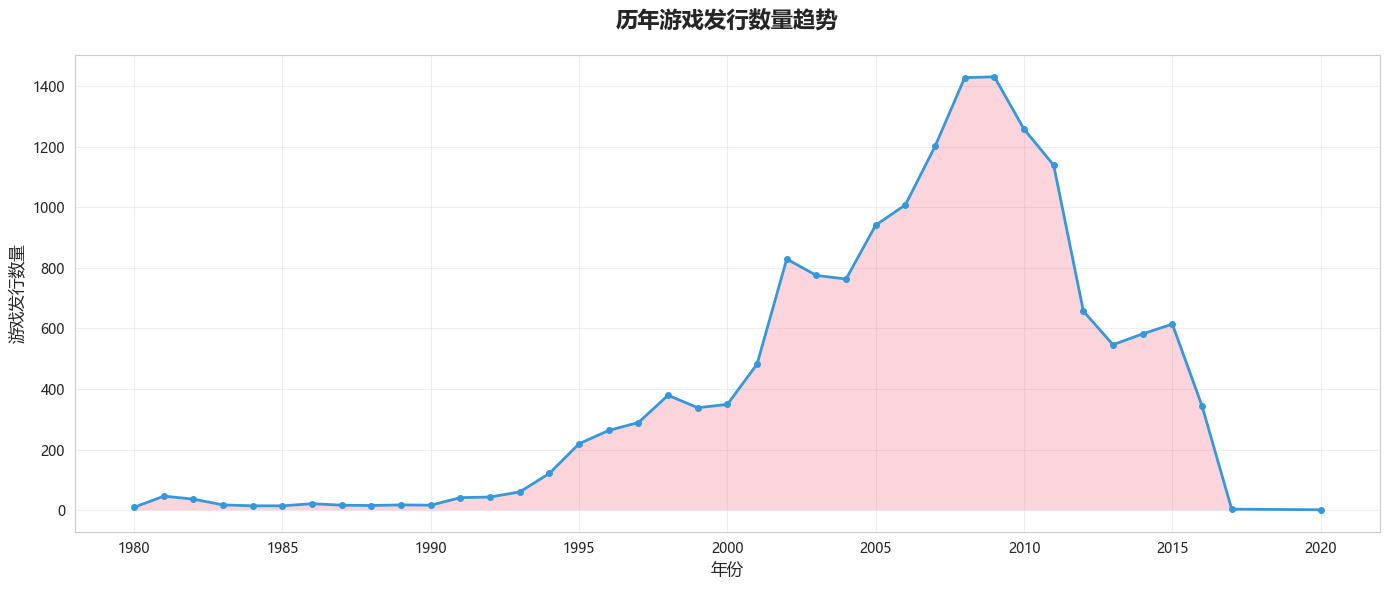


🎮 游戏发行数量最多的年份: 2009年，共发行 1431 款游戏


In [16]:
## 2️⃣ 历年游戏发行数量趋势

# 确保中文字体生效
ensure_chinese()

# 按年份统计游戏发行数量
games_per_year = df_with_year.groupby('Year').size().reset_index(name='游戏数量')

# 可视化
plt.figure(figsize=(14, 6))
plt.plot(games_per_year['Year'], games_per_year['游戏数量'], 
         marker='o', linewidth=2, markersize=4, color='#3498db')
plt.fill_between(games_per_year['Year'], games_per_year['游戏数量'], alpha=0.3)

plt.title('历年游戏发行数量趋势', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('游戏发行数量', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 找出发行数量最多的年份
peak_year = games_per_year.loc[games_per_year['游戏数量'].idxmax()]
print(f"\n🎮 游戏发行数量最多的年份: {int(peak_year['Year'])}年，共发行 {int(peak_year['游戏数量'])} 款游戏")


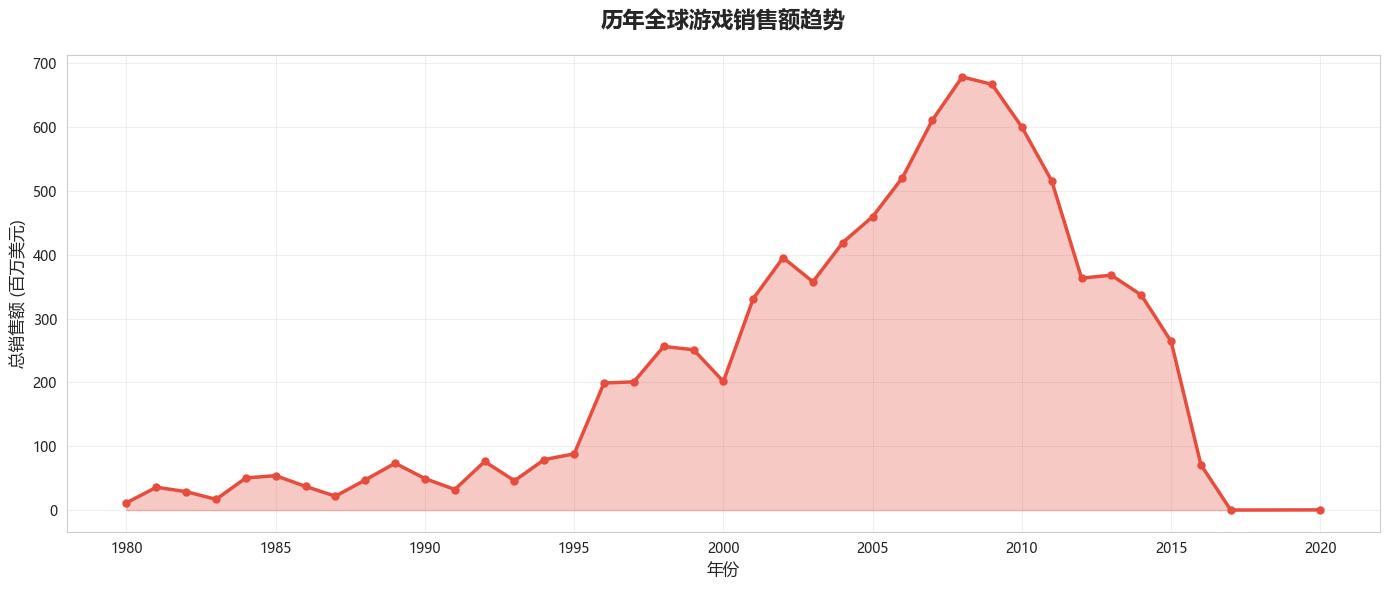


💎 销售额最高的年份: 2008年，总销售额 678.90 百万美元

📈 销售额最高的5个年份:
   2008年: 678.90 百万美元
   2009年: 667.30 百万美元
   2007年: 611.05 百万美元
   2010年: 600.41 百万美元
   2006年: 521.04 百万美元


In [5]:
## 3️⃣ 历年全球销售额趋势

# 确保中文字体生效
ensure_chinese()

# 按年份统计总销售额
sales_per_year = df_with_year.groupby('Year')['Global_Sales'].sum().reset_index()
sales_per_year.columns = ['Year', '总销售额(百万)']

# 可视化
plt.figure(figsize=(14, 6))
plt.plot(sales_per_year['Year'], sales_per_year['总销售额(百万)'], 
         marker='o', linewidth=2.5, markersize=5, color='#e74c3c')
plt.fill_between(sales_per_year['Year'], sales_per_year['总销售额(百万)'], alpha=0.3, color='#e74c3c')

plt.title('历年全球游戏销售额趋势', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('总销售额 (百万美元)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 找出销售额最高的年份
best_year = sales_per_year.loc[sales_per_year['总销售额(百万)'].idxmax()]
print(f"\n💎 销售额最高的年份: {int(best_year['Year'])}年，总销售额 {best_year['总销售额(百万)']:.2f} 百万美元")

# 显示前5年
print("\n📈 销售额最高的5个年份:")
top5_years = sales_per_year.nlargest(5, '总销售额(百万)')
for idx, row in top5_years.iterrows():
    print(f"   {int(row['Year'])}年: {row['总销售额(百万)']:.2f} 百万美元")


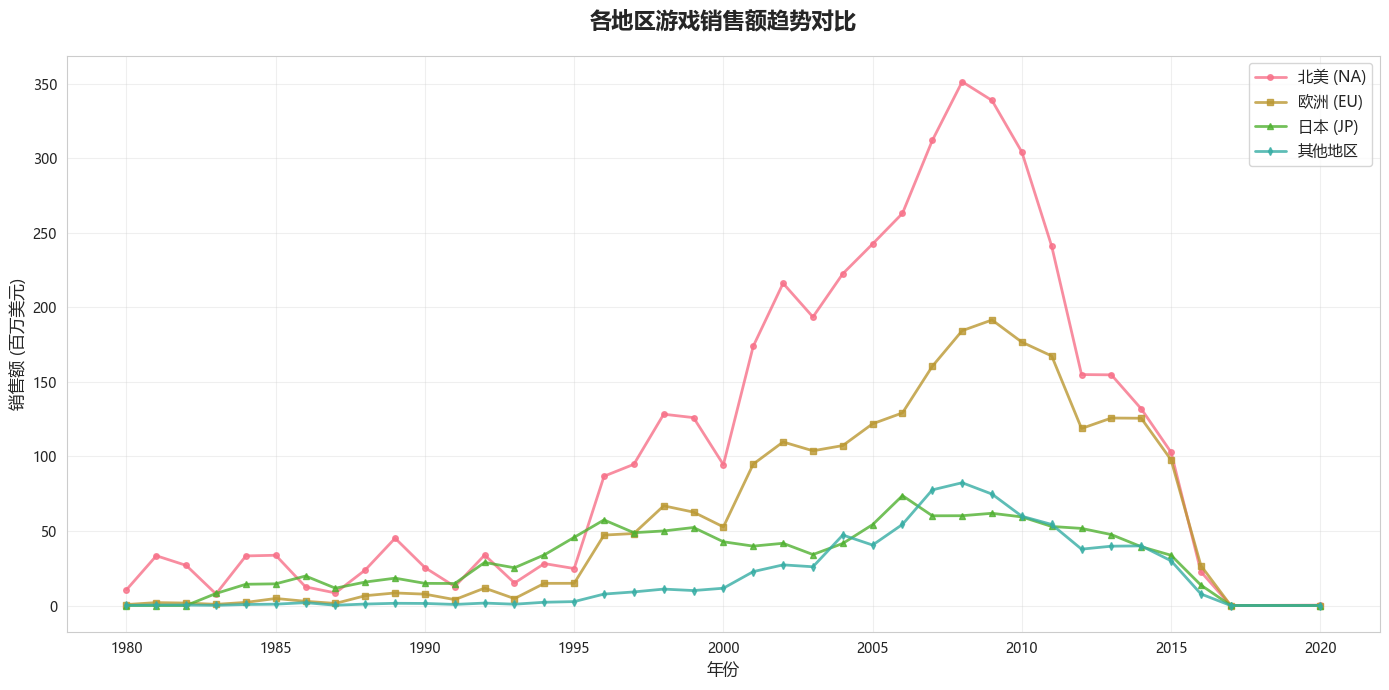


🌐 各地区历史总销售额占比:
   北美: 4333.43M (49.2%)
   欧洲: 2409.12M (27.3%)
   日本: 1284.18M (14.6%)
   其他: 789.01M (9.0%)


In [6]:
## 4️⃣ 各地区销售额时间趋势对比

# 确保中文字体生效
ensure_chinese()

# 按年份统计各地区销售额
region_sales = df_with_year.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# 可视化
plt.figure(figsize=(14, 7))
plt.plot(region_sales['Year'], region_sales['NA_Sales'], 
         marker='o', linewidth=2, markersize=4, label='北美 (NA)', alpha=0.8)
plt.plot(region_sales['Year'], region_sales['EU_Sales'], 
         marker='s', linewidth=2, markersize=4, label='欧洲 (EU)', alpha=0.8)
plt.plot(region_sales['Year'], region_sales['JP_Sales'], 
         marker='^', linewidth=2, markersize=4, label='日本 (JP)', alpha=0.8)
plt.plot(region_sales['Year'], region_sales['Other_Sales'], 
         marker='d', linewidth=2, markersize=4, label='其他地区', alpha=0.8)

plt.title('各地区游戏销售额趋势对比', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('销售额 (百万美元)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 计算各地区总销售额占比
total_na = region_sales['NA_Sales'].sum()
total_eu = region_sales['EU_Sales'].sum()
total_jp = region_sales['JP_Sales'].sum()
total_other = region_sales['Other_Sales'].sum()
grand_total = total_na + total_eu + total_jp + total_other

print("\n🌐 各地区历史总销售额占比:")
print(f"   北美: {total_na:.2f}M ({total_na/grand_total*100:.1f}%)")
print(f"   欧洲: {total_eu:.2f}M ({total_eu/grand_total*100:.1f}%)")
print(f"   日本: {total_jp:.2f}M ({total_jp/grand_total*100:.1f}%)")
print(f"   其他: {total_other:.2f}M ({total_other/grand_total*100:.1f}%)")


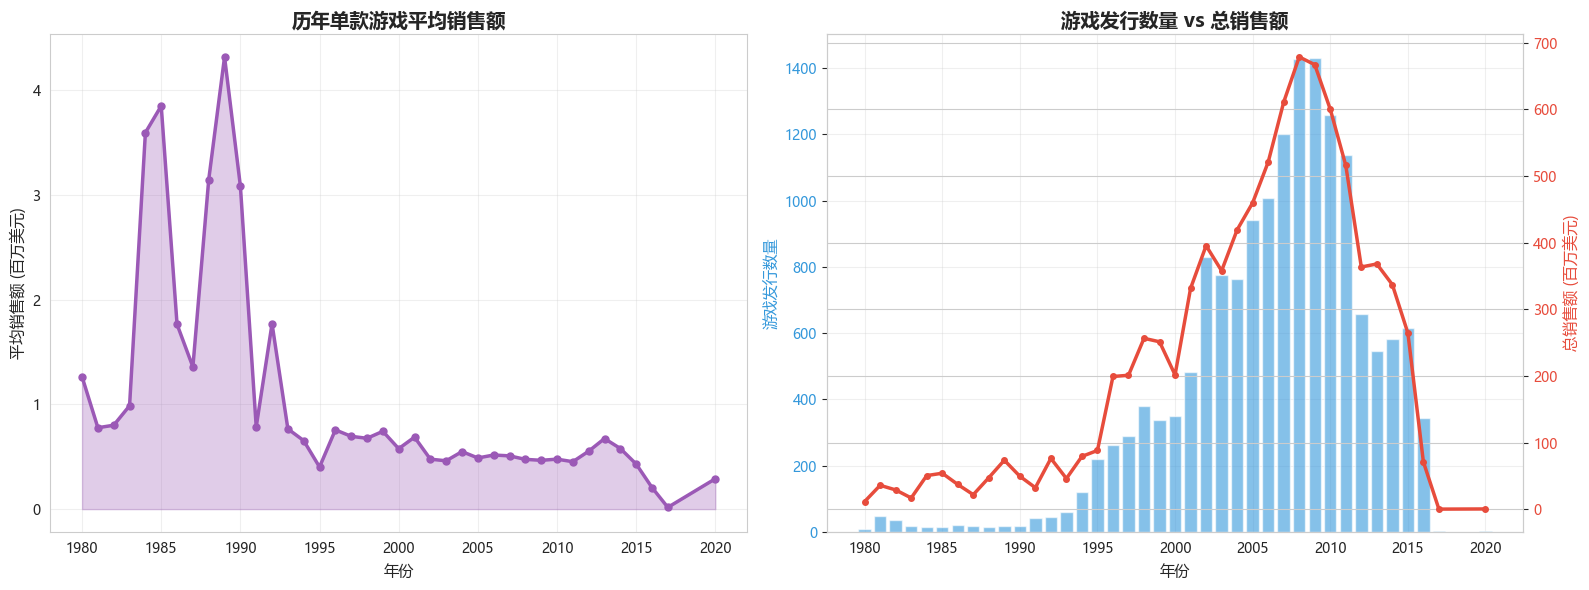


📊 平均销售额最高的年份: 1989年
   平均每款游戏销售: 4.321 百万美元

📊 平均销售额最低的年份: 2017年
   平均每款游戏销售: 0.017 百万美元


In [15]:
## 5️⃣ 单款游戏平均销售额趋势

# 确保中文字体生效
ensure_chinese()

# 计算每年的平均销售额
avg_sales_per_year = df_with_year.groupby('Year')['Global_Sales'].mean().reset_index()
avg_sales_per_year.columns = ['Year', '平均销售额(百万)']

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：平均销售额趋势
ax1.plot(avg_sales_per_year['Year'], avg_sales_per_year['平均销售额(百万)'], 
         marker='o', linewidth=2.5, markersize=5, color='#9b59b6')
ax1.fill_between(avg_sales_per_year['Year'], avg_sales_per_year['平均销售额(百万)'], alpha=0.3, color='#9b59b6')
ax1.set_title('历年单款游戏平均销售额', fontsize=14, fontweight='bold')
ax1.set_xlabel('年份', fontsize=11)
ax1.set_ylabel('平均销售额 (百万美元)', fontsize=11)
ax1.grid(True, alpha=0.3)

# 右图：发行数量 vs 总销售额
ax2_twin = ax2.twinx()
ax2.bar(games_per_year['Year'], games_per_year['游戏数量'], alpha=0.6, color='#3498db', label='发行数量')
ax2_twin.plot(sales_per_year['Year'], sales_per_year['总销售额(百万)'], 
              marker='o', linewidth=2.5, markersize=4, color='#e74c3c', label='总销售额')

ax2.set_title('游戏发行数量 vs 总销售额', fontsize=14, fontweight='bold')
ax2.set_xlabel('年份', fontsize=11)
ax2.set_ylabel('游戏发行数量', fontsize=11, color='#3498db')
ax2_twin.set_ylabel('总销售额 (百万美元)', fontsize=11, color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#3498db')
ax2_twin.tick_params(axis='y', labelcolor='#e74c3c')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 统计信息
print(f"\n📊 平均销售额最高的年份: {int(avg_sales_per_year.loc[avg_sales_per_year['平均销售额(百万)'].idxmax(), 'Year'])}年")
print(f"   平均每款游戏销售: {avg_sales_per_year['平均销售额(百万)'].max():.3f} 百万美元")
print(f"\n📊 平均销售额最低的年份: {int(avg_sales_per_year.loc[avg_sales_per_year['平均销售额(百万)'].idxmin(), 'Year'])}年")
print(f"   平均每款游戏销售: {avg_sales_per_year['平均销售额(百万)'].min():.3f} 百万美元")


🎮 不同时代的游戏市场表现:

                    游戏数量  总销售额(百万)  平均销售额(百万)
时代                                           
2000年代 (次世代崛起)      9207   4643.94       0.50
2010年代 (现代游戏)       5144   2520.81       0.49
1990年代 (16位/32位时代)  1769   1278.91       0.72
1980年代 (早期)          205    376.58       1.84



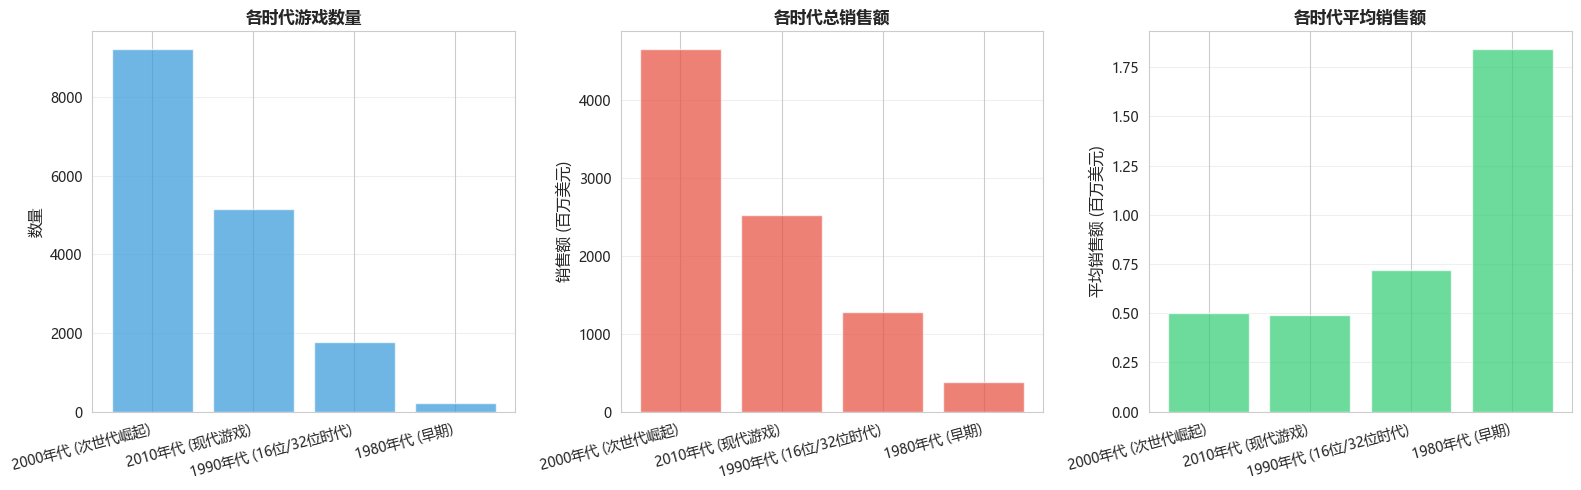

In [8]:
## 6️⃣ 销售趋势综合分析

# 确保中文字体生效
ensure_chinese()

# 分时期分析：将数据分为几个重要时期
def categorize_era(year):
    if year < 1990:
        return "1980年代 (早期)"
    elif year < 2000:
        return "1990年代 (16位/32位时代)"
    elif year < 2010:
        return "2000年代 (次世代崛起)"
    else:
        return "2010年代 (现代游戏)"

df_with_year['时代'] = df_with_year['Year'].apply(categorize_era)

# 按时代统计
era_stats = df_with_year.groupby('时代').agg({
    'Name': 'count',
    'Global_Sales': ['sum', 'mean']
}).round(2)

era_stats.columns = ['游戏数量', '总销售额(百万)', '平均销售额(百万)']
era_stats = era_stats.sort_values('游戏数量', ascending=False)

print("🎮 不同时代的游戏市场表现:\n")
print(era_stats)
print("\n" + "="*60)

# 可视化不同时代的对比
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 游戏数量
axes[0].bar(range(len(era_stats)), era_stats['游戏数量'], color='#3498db', alpha=0.7)
axes[0].set_xticks(range(len(era_stats)))
axes[0].set_xticklabels(era_stats.index, rotation=15, ha='right')
axes[0].set_title('各时代游戏数量', fontsize=12, fontweight='bold')
axes[0].set_ylabel('数量')
axes[0].grid(True, alpha=0.3, axis='y')

# 总销售额
axes[1].bar(range(len(era_stats)), era_stats['总销售额(百万)'], color='#e74c3c', alpha=0.7)
axes[1].set_xticks(range(len(era_stats)))
axes[1].set_xticklabels(era_stats.index, rotation=15, ha='right')
axes[1].set_title('各时代总销售额', fontsize=12, fontweight='bold')
axes[1].set_ylabel('销售额 (百万美元)')
axes[1].grid(True, alpha=0.3, axis='y')

# 平均销售额
axes[2].bar(range(len(era_stats)), era_stats['平均销售额(百万)'], color='#2ecc71', alpha=0.7)
axes[2].set_xticks(range(len(era_stats)))
axes[2].set_xticklabels(era_stats.index, rotation=15, ha='right')
axes[2].set_title('各时代平均销售额', fontsize=12, fontweight='bold')
axes[2].set_ylabel('平均销售额 (百万美元)')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [14]:
## 📝 销售趋势分析 - 关键发现总结

print("="*70)
print("                     🎯 销售趋势分析 - 关键发现                      ")
print("="*70)
print()

# 1. 市场规模变化
total_sales_all = df_with_year['Global_Sales'].sum()
print(f"✅ 1. 市场规模")
print(f"   • 数据集涵盖总销售额: {total_sales_all:,.2f} 百万美元")
print(f"   • 游戏总数: {len(df_with_year):,} 款")
print()

# 2. 黄金时期
peak_sales_year = sales_per_year.loc[sales_per_year['总销售额(百万)'].idxmax()]
peak_games_year = games_per_year.loc[games_per_year['游戏数量'].idxmax()]
print(f"✅ 2. 市场黄金时期")
print(f"   • 销售额峰值: {int(peak_sales_year['Year'])}年 ({peak_sales_year['总销售额(百万)']:.2f}M)")
print(f"   • 发行量峰值: {int(peak_games_year['Year'])}年 ({int(peak_games_year['游戏数量'])} 款游戏)")
print()

# 3. 地区市场分布
print(f"✅ 3. 地区市场特征")
print(f"   • 北美市场: 最大市场，占比 {total_na/grand_total*100:.1f}%")
print(f"   • 欧洲市场: 第二大市场，占比 {total_eu/grand_total*100:.1f}%")
print(f"   • 日本市场: 占比 {total_jp/grand_total*100:.1f}%")
print()

# 4. 市场趋势
recent_years = sales_per_year[sales_per_year['Year'] >= 2010]
if len(recent_years) > 0:
    recent_avg = recent_years['总销售额(百万)'].mean()
    early_years = sales_per_year[sales_per_year['Year'] < 2000]
    early_avg = early_years['总销售额(百万)'].mean()
    print(f"✅ 4. 长期趋势")
    print(f"   • 2010年后年均销售: {recent_avg:.2f}M")
    print(f"   • 2000年前年均销售: {early_avg:.2f}M")
    print(f"   • 市场成长倍数: {recent_avg/early_avg:.1f}x")
    print()

# 5. 质量vs数量
print(f"✅ 5. 产品策略洞察")
best_avg_year = avg_sales_per_year.loc[avg_sales_per_year['平均销售额(百万)'].idxmax()]
print(f"   • 平均销售额最高年份: {int(best_avg_year['Year'])}年")
print(f"   • 说明: 不是发行量越多越好，质量和市场接受度更重要")
print()

print("="*70)
print("💡 建议: 接下来可以深入分析平台、游戏类型、发行商等维度")
print("="*70)


                     🎯 销售趋势分析 - 关键发现                      

✅ 1. 市场规模
   • 数据集涵盖总销售额: 8,820.24 百万美元
   • 游戏总数: 16,325 款

✅ 2. 市场黄金时期
   • 销售额峰值: 2008年 (678.90M)
   • 发行量峰值: 2009年 (1431 款游戏)

✅ 3. 地区市场特征
   • 北美市场: 最大市场，占比 49.2%
   • 欧洲市场: 第二大市场，占比 27.3%
   • 日本市场: 占比 14.6%

✅ 4. 长期趋势
   • 2010年后年均销售: 280.09M
   • 2000年前年均销售: 82.77M
   • 市场成长倍数: 3.4x

✅ 5. 产品策略洞察
   • 平均销售额最高年份: 1989年
   • 说明: 不是发行量越多越好，质量和市场接受度更重要

💡 建议: 接下来可以深入分析平台、游戏类型、发行商等维度
